# Análisis de ventas con python: 
## descubriendo patrones y tendencias

In [35]:
# Importamos las Bibliotecas necesarias para el análisis de datos
import pandas as pd
import os
import matplotlib.pyplot as plt
import re
import datetime as dt
import seaborn as sns
sns.set_style('whitegrid')

import itertools 
from itertools import combinations
import collections
from collections import Counter

# Establecemos el estilo de los gráficos
sns.set_style('whitegrid')
sns.set_style('darkgrid')

"""
Es una buena práctica colocar las importaciones de bibliotecas al principio del código y juntas,
ya que esto hace que el código sea más fácil de leer y entender.

Además, al colocarlas al principio,
odemos identificar rápidamente qué bibliotecas se están utilizando 
y si es necesario agregar alguna nueva biblioteca para el código que estamos escribiendo.
"""

'\nEs una buena práctica colocar las importaciones de bibliotecas al principio del código y juntas,\nya que esto hace que el código sea más fácil de leer y entender.\n\nAdemás, al colocarlas al principio,\nodemos identificar rápidamente qué bibliotecas se están utilizando \ny si es necesario agregar alguna nueva biblioteca para el código que estamos escribiendo.\n'

In [36]:
# leer archivos
os.listdir("files")

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

## lectura de csv de pandas

In [37]:
df = pd.DataFrame()

In [38]:
# Obtenemos una lista de los archivos en el directorio 'files'
files = os.listdir("files")

# Iteramos sobre cada archivo en la lista
for x in files:
    
    # Leemos el archivo y lo almacenamos en el dataframe 'file'
    file = pd.read_csv('files/' + x)
    
    # Combinamos el dataframe 'file' con el dataframe 'df' y almacenamos el resultado en 'df'
    df = pd.concat([file ,df])


In [39]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [40]:
# exploración básica
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [41]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [42]:
# conteo de valores nulos
df.isnull().value_counts()

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
True      True     True              True        True        True                   545
dtype: int64

In [43]:
# conteo de valores nulos de order id
df["Order ID"].isnull().value_counts()

False    186305
True        545
Name: Order ID, dtype: int64

In [44]:
# eliminamos valores nulos
df=df[df["Order ID"].notnull()]

In [45]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,09/17/19 14:44,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,09/29/19 10:19,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,09/16/19 17:48,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,09/27/19 07:52,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,09/01/19 19:03,"125 5th St, Atlanta, GA 30301"


In [46]:
df.isnull().value_counts() # ya no tenemos valores nulos

Order ID  Product  Quantity Ordered  Price Each  Order Date  Purchase Address
False     False    False             False       False       False               186305
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [48]:
df=df[df['Product'] != 'Product']

In [49]:
# Convertir la columna 'Quantity Ordered' a tipo de datos 'int64'
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')

# Convertir la columna 'Price Each' a tipo de datos 'float'
df['Price Each'] = df['Price Each'].astype('float')

# Convertir la columna 'Order Date' a tipo de datos 'datetime'
df['Order Date'] = pd.to_datetime(df['Order Date'])


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


Una vez que tenemos listos nuestros datos, comenzamos a explorarlos y hacer preguntas que nos permitan descubrir patrones y tendencias. 
En este análisis de ventas con Python, veremos cómo utilizar diversas técnicas para responder preguntas importantes sobre nuestro negocio y tomar decisiones informadas en base a los resultados obtenidos.

## ¿cuál es el mes con la venta más alta?

In [51]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001"
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301"
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001"
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101"
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301"


In [52]:
# extraer mes
df['Mes'] = df['Order Date'].dt.month\

# precio * cantidad
df['Total_ventas'] = df['Quantity Ordered'] * df['Price Each']

In [53]:
# agrupaciones por mes
df_mes = df.groupby('Mes').sum(numeric_only=True)


# resetear el índice
df_mes = df_mes.reset_index()

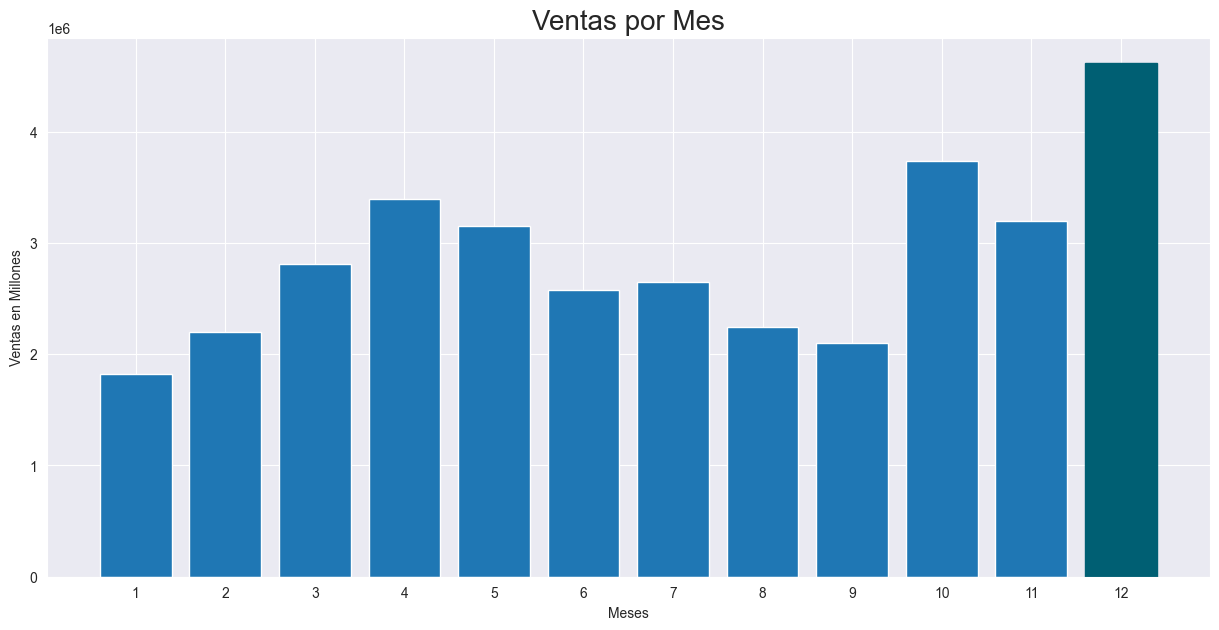

In [54]:
# Crear la figura y el subplot para la gráfica de barras
fig, ax = plt.subplots(figsize=(15, 7))

# Crear la barra para la gráfica de barras utilizando los datos de ventas por mes
bars = ax.bar(df_mes['Mes'], df_mes['Total_ventas'])

# Establecer los ticks del eje x para la gráfica de barras utilizando los datos de meses
ax.set_xticks(df_mes['Mes'])

# Establecer el título de la gráfica
ax.set_title('Ventas por Mes', size=20)

# Establecer las etiquetas de los ejes de la gráfica de barras
ax.set_xlabel('Meses')
ax.set_ylabel('Ventas en Millones')

# Resaltar una barra en la gráfica de barras
bars[11].set_color('#005f73')

# Mostrar la figura con la gráfica de barras
plt.show()


In [55]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_ventas
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95


## ¿cuál es la cuidad con mayor ventas?

In [56]:
# Agregar una columna 'Ciudad' al dataframe 'df' que extrae la ciudad de la dirección de compra
df['Ciudad'] = df['Purchase Address'].apply(lambda x: x.split(',')[1])

In [57]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [58]:
# Agrupar los datos del dataframe 'df' por ciudad y sumar los totales de ventas por ciudad
df_ciudad = df.groupby('Ciudad').sum()

# Resetear el índice del dataframe 'df_ciudad' para que la columna de ciudades se convierta en una columna normal
df_ciudad = df_ciudad.reset_index()

C:\Users\hp\AppData\Local\Temp\ipykernel_10548\3652101366.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ciudad = df.groupby('Ciudad').sum()


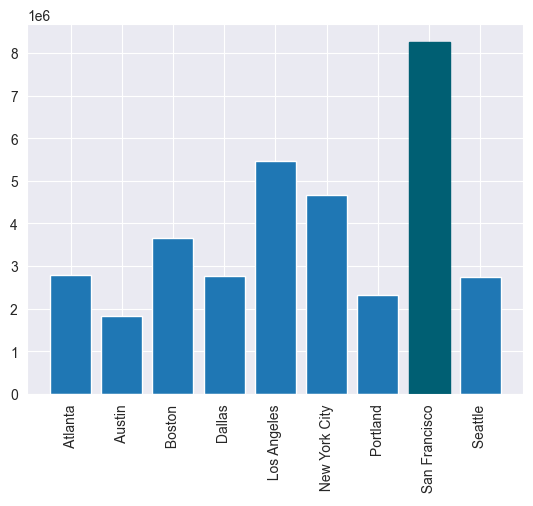

In [59]:
# Crear el objeto de gráfico de barras y asignarlo a la variable 'bars'
bars = plt.bar(df_ciudad['Ciudad'], df_ciudad['Total_ventas'])

# Rotar las etiquetas del eje x en 90 grados para hacerlas más legibles
plt.xticks(rotation=90)

# Cambiar el color de la séptima barra en la gráfica a rojo
# Nota: como las listas en Python comienzan en 0, el índice de la séptima barra es 6
bars[7].set_color('#005f73')

# Mostrar la gráfica de barras
plt.show()

## ¿cuál es la hora que más se venden productos?

In [60]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_ventas,Ciudad
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta


In [61]:
# Agregar una nueva columna 'Hora' al DataFrame
# La nueva columna será el valor de la hora extraído de la columna 'Order Date'
df['Hora'] = df['Order Date'].apply(lambda x: x.hour)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Mes,Total_ventas,Ciudad,Hora
0,248151,AA Batteries (4-pack),4,3.84,2019-09-17 14:44:00,"380 North St, Los Angeles, CA 90001",9,15.36,Los Angeles,14
1,248152,USB-C Charging Cable,2,11.95,2019-09-29 10:19:00,"511 8th St, Austin, TX 73301",9,23.90,Austin,10
2,248153,USB-C Charging Cable,1,11.95,2019-09-16 17:48:00,"151 Johnson St, Los Angeles, CA 90001",9,11.95,Los Angeles,17
3,248154,27in FHD Monitor,1,149.99,2019-09-27 07:52:00,"355 Hickory St, Seattle, WA 98101",9,149.99,Seattle,7
4,248155,USB-C Charging Cable,1,11.95,2019-09-01 19:03:00,"125 5th St, Atlanta, GA 30301",9,11.95,Atlanta,19


In [62]:
# Seleccionar solo las columnas numéricas del DataFrame
df_num = df.select_dtypes(include='number')

# Agrupar los datos del DataFrame por hora y sumar las columnas numéricas
df_hour = df_num.groupby('Hora').sum()

# Reiniciar el índice del DataFrame resultante
df_hour = df_hour.reset_index()

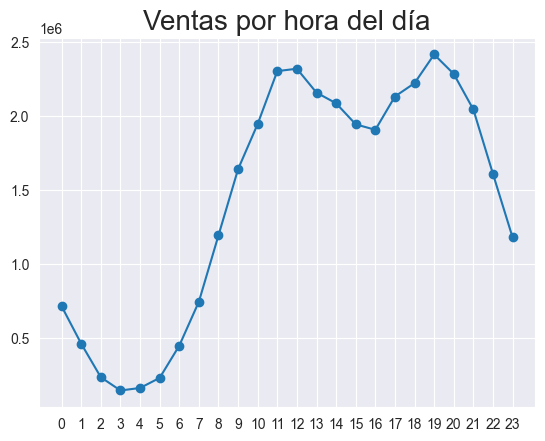

In [63]:
# Crear un gráfico de línea con la columna 'Total_ventas' del DataFrame agrupado por hora
plt.plot(df_hour['Total_ventas'], marker='o')

# Establecer las etiquetas del eje X con la columna 'Hora' del DataFrame agrupado por hora
plt.xticks(df_hour['Hora'])

#Título de gráfica
plt.title('Ventas por hora del día', size=20)

# Mostrar el gráfico
plt.show()


## ¿cuáles son los productos que se venden juntos?

In [64]:
# Seleccionar las filas del DataFrame que tienen valores duplicados en la columna 'Order ID'
# El argumento keep=False indica que se deben marcar todas las filas duplicadas, no solo las primeras o las últimas.
df = df[df['Order ID'].duplicated(keep=False)]

# Agrupar los productos por 'Order ID' y crear una nueva columna 'agrupado' en el DataFrame
# La función lambda concatena los nombres de los productos en cada grupo separándolos por comas.
df['agrupado'] = df.groupby(['Order ID'])['Product'].transform(lambda x: ','.join(x))

# Seleccionar solo las columnas 'Order ID' y 'agrupado' del DataFrame
df = df[['Order ID' , 'agrupado']]

# Eliminar todas las filas duplicadas del DataFrame
# Esto asegura que cada 'Order ID' solo aparezca una vez en el DataFrame final.
df = df.drop_duplicates()


In [65]:
# Creamos un objeto Counter vacío
count = Counter()

# Iteramos sobre la columna 'agrupado' del dataframe 'df'
for r in df['agrupado']:
    
    # Dividimos la cadena en una lista de filas
    filas = r.split(',')
    
    # Obtenemos todas las combinaciones de 2 elementos en la lista de filas y las contamos
    count.update(Counter(combinations(filas,2)))

In [66]:
count

Counter({('USB-C Charging Cable', 'USB-C Charging Cable'): 48,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Bose SoundSport Headphones', 'Google Phone'): 8,
         ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Vareebadd Phone', 'Wired Headphones'): 143,
         ('iPhone', 'Apple Airpods Headphones'): 360,
         ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81,
         ('Bose SoundSport Headphones', '34in Ultrawide Monitor'): 11,
         ('Apple Airpods Headphones', 'Lightning Charging Cable'): 35,
         ('27in 4K Gaming Monitor', 'AA Batteries (4-pack)'): 12,
         ('Vareebadd Phone', 'USB-C Charging Cable'): 361,
         ('Lightning Charging Cable', 'Bose SoundSport Headphones'): 39,
         ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55,
         ('AA Batteries (4-pack)', 'AA Batteries (4-pack)'): 35,
         ('Lightning Charging Cable', '27in

In [67]:
# Obtenemos las 10 combinaciones más comunes y las almacenamos en la variable 'comunes'
comunes = count.most_common(10)

# Mostramos las combinaciones más comunes
comunes

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]